In [1]:
import numpy as np
from numpy import linalg as lin
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import math as m

# Illustratory example: Toy model

In [2]:
# create a k-regular graph
G_reg=nx.Graph()

N=100
k=10

for n in range(N):
    G_reg.add_node(n,pos=(m.cos(n*(2*m.pi)/N),m.sin(n*(2*m.pi)/N)))

for n in range(N):
    neighbours=np.mod(np.concatenate((np.linspace(n-k,n-1,k),np.linspace(n+k,n+1,k))),N).astype(int)
    for e in neighbours:
        G_reg.add_edge(n,e)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


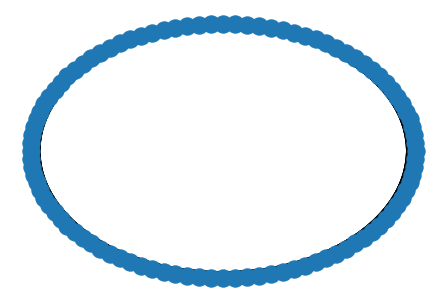

In [3]:
pos=nx.get_node_attributes(G_reg,'pos')
nx.draw(G_reg,pos=pos)
nx.draw_networkx_edges(G_reg,pos=pos)

In [4]:
# create the combinatorial Laplacian L
A_reg=np.asarray(nx.to_numpy_matrix(G_reg))
L_reg=np.diag(A_reg.sum(0))-A_reg
# print(L_reg)

In [5]:
# Eigenvalues and eigenvectors of L, sorted by increasing eigenvalues
w, v = np.linalg.eigh(L_reg) #eigenvalues/eigenvectors
w_sort = np.argsort(w)
w = np.real(w[w_sort])
v = np.real(v[:,w_sort])

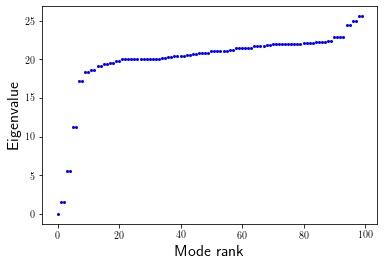

In [6]:
# plot the eigenvalues
plt.figure()
plt.plot(range(N),w,'bo',Markersize=2)
plt.xlabel('Mode rank',Fontsize=16)
plt.ylabel('Eigenvalue',Fontsize=16)
plt.show()

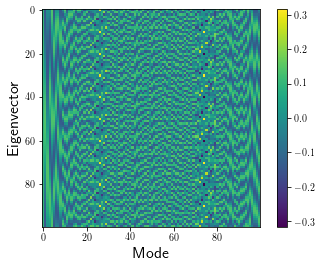

In [7]:
# plot the eigenvectors
plt.figure()
plt.imshow(v)
plt.ylabel('Eigenvector',Fontsize=16)
plt.xlabel('Mode',Fontsize=16)
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


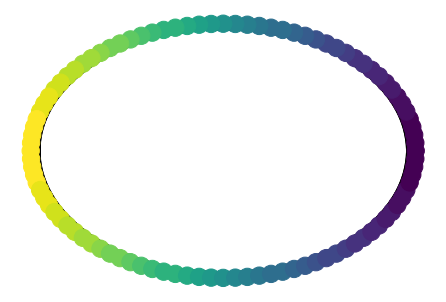

In [8]:
# eigenvector/mode represented on the graph
mode=1

nx.set_edge_attributes(G_reg,0,'core_edge')
colour_map=[0]*len(G_reg.nodes())
for node in G_reg.nodes():
    colour_map[node]=np.around(v[int(node),mode],2)
    
plt.figure()
nx.draw(G_reg,pos=pos,node_color=colour_map)
plt.show()

## Signal projection

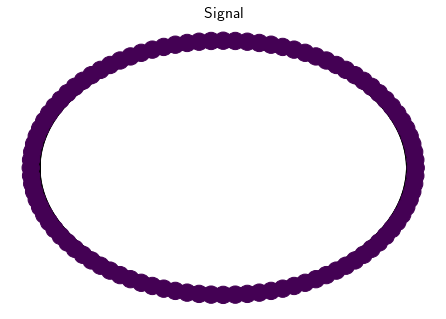

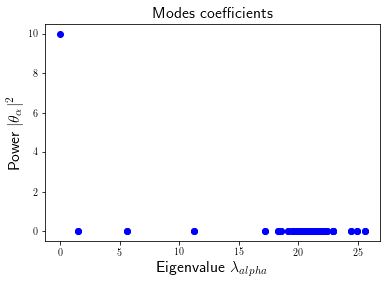

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


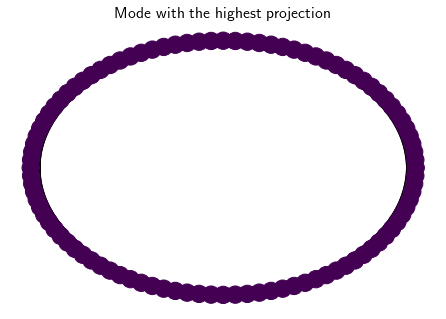

In [9]:
# projection of a constant function
signal=np.ones(N)
trans=v.T.dot(signal)

# signal
nx.set_edge_attributes(G_reg,0,'core_edge')
colour_map=[0]*len(G_reg.nodes())
for node in G_reg.nodes():
    colour_map[node]=np.around(signal[int(node)],2)
    
plt.figure()
nx.draw(G_reg,pos=pos,node_color=colour_map)
plt.title('Signal',Fontsize=16)
plt.show()

# mods coefficients
plt.figure()
plt.plot(w,trans,'bo')
plt.title('Modes coefficients',Fontsize=16)
plt.xlabel(r'Eigenvalue $\lambda_{alpha}$',Fontsize=16)
plt.ylabel(r'Power $|\theta_{\alpha}|^2$',Fontsize=16)# change label
plt.show()

# eigenvector with highest projection
mode=np.argmax(trans)

nx.set_edge_attributes(G_reg,0,'core_edge')
colour_map=[0]*len(G_reg.nodes())
for node in G_reg.nodes():
    colour_map[node]=np.around(v[int(node),mode],2)
    
plt.figure()
nx.draw(G_reg,pos=pos,node_color=colour_map)
plt.title('Mode with the highest projection',Fontsize=16)
plt.show()

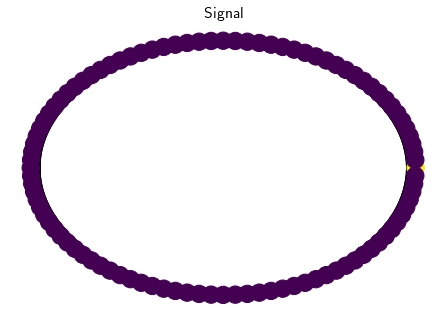

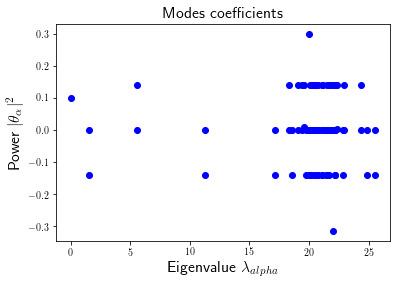

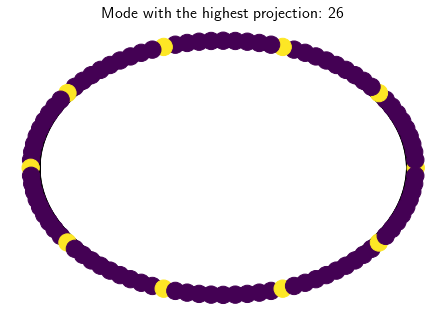

In [10]:
# projection of a "delta" function
signal=np.zeros(N)
signal[0]=1
trans=v.T.dot(signal)

# signal
nx.set_edge_attributes(G_reg,0,'core_edge')
colour_map=[0]*len(G_reg.nodes())
for node in G_reg.nodes():
    colour_map[node]=np.around(signal[int(node)],2)
    
plt.figure()
nx.draw(G_reg,pos=pos,node_color=colour_map)
plt.title('Signal',Fontsize=16)
plt.show()

# mods coefficients
plt.figure()
plt.plot(w,trans,'bo')
plt.title('Modes coefficients',Fontsize=16)
plt.xlabel(r'Eigenvalue $\lambda_{alpha}$',Fontsize=16)
plt.ylabel(r'Power $|\theta_{\alpha}|^2$',Fontsize=16)# change label
plt.show()

# eigenvector with highest projection
mode=np.argmax(trans)

nx.set_edge_attributes(G_reg,0,'core_edge')
colour_map=[0]*len(G_reg.nodes())
for node in G_reg.nodes():
    colour_map[node]=np.around(v[int(node),mode],2)
    
plt.figure()
nx.draw(G_reg,pos=pos,node_color=colour_map)
plt.title('Mode with the highest projection: '+str(mode),Fontsize=16)
plt.show()

## Power spectrum

In [11]:
# constant signal
T=10
signal=np.ones((N,T))
trans=v.T.dot(signal)

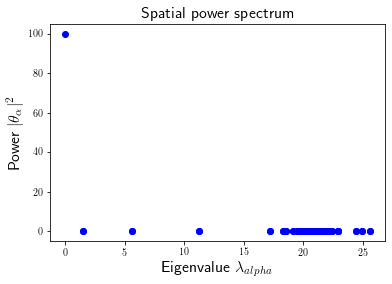

In [12]:
I=np.power(np.abs(trans),2).sum(1)/T

plt.figure()
plt.plot(w,I,'bo')
plt.xlabel(r'Eigenvalue $\lambda_{alpha}$',Fontsize=16)
plt.ylabel(r'Power $|\theta_\alpha|^2$',Fontsize=16)
plt.title('Spatial power spectrum',Fontsize=16)
plt.show()

# Illustratory example: time varying function

In [13]:
# load the adjacency matrix
dataset=15 #125/15/175
N=2048
A=np.reshape(np.loadtxt('matrixbin'+str(dataset)+'.dat'),(N,N))

In [14]:
# load the signal
signal_time=np.loadtxt('posit'+str(dataset)+'.dat')
T=int(signal_time.shape[0]/2048)
signal_time=np.reshape(signal_time,(T,2048))

In [15]:
# Eigenvalues and eigenvectors of L, sorted by increasing eigenvalues
L=np.diag(A.sum(0))-A
w, v = np.linalg.eigh(L) #eigenvalues/eigenvectors
w_sort = np.argsort(w)
w = np.real(w[w_sort])
v = np.real(v[:,w_sort])

In [16]:
# projection of each time step onto the eigenbasis
trans_time=v.T.dot(signal_time.T)
# demeaning of the signal
mtrans_time=np.mean(trans_time,1)
mtrans_time=np.reshape(np.repeat(mtrans_time,T),(N,T))
trans_time=trans_time-mtrans_time

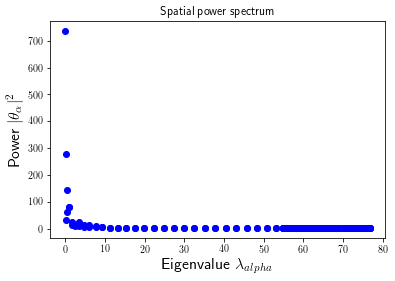

In [17]:
# spatial power spectrum
I=np.power(np.abs(trans_time),2).sum(1)/T

# 
plt.figure()
plt.plot(w,I,'bo')
plt.xlabel(r'Eigenvalue $\lambda_{alpha}$',Fontsize=16)
plt.ylabel(r'Power $|\theta_\alpha|^2$',Fontsize=16)
plt.title('Spatial power spectrum')
plt.show()

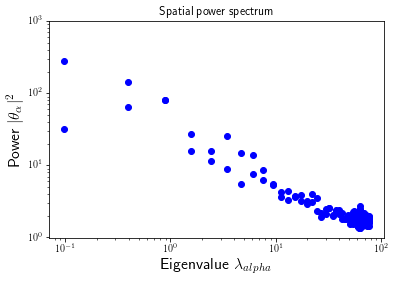

In [18]:
plt.figure()
plt.loglog(w,I,'bo')
plt.xlabel(r'Eigenvalue $\lambda_{alpha}$',Fontsize=16)
plt.ylabel(r'Power $|\theta_\alpha|^2$',Fontsize=16)
plt.title('Spatial power spectrum')
plt.show()